In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['name_wt','statuses_count', 'followers_count', 'friends_count','favourites_count','listed_count']
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['label']].values
x = StandardScaler().fit_transform(x)

In [4]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [5]:
number_of_components=2
pca = PCA(n_components=number_of_components)
principalComponents = pca.fit_transform(x)
column_names= [] 

for i in range(1,number_of_components+1):
    print(i)
    column_names.append('principal_component_'+str(i))
    
principalDf = pd.DataFrame(data = principalComponents
             , columns = column_names)
principalDf['label']=y

1
2


In [6]:
principalDf

,principal_component_1,principal_component_2,label
0,-0.458678,0.767827,1
1,0.055292,0.567991,1
2,-0.450533,0.719966,1
3,-0.038745,1.023817,1
4,0.847636,-1.126480,0
5,0.040490,0.608613,1
6,-0.451569,0.733325,1
7,-0.464257,0.755991,1
8,-0.297336,0.418573,0
9,-0.451054,0.732788,1


In [7]:
export_csv = principalDf.to_csv ('data/twitter_dataset2.csv', index = None, header=True) 

KeyError: 'target'

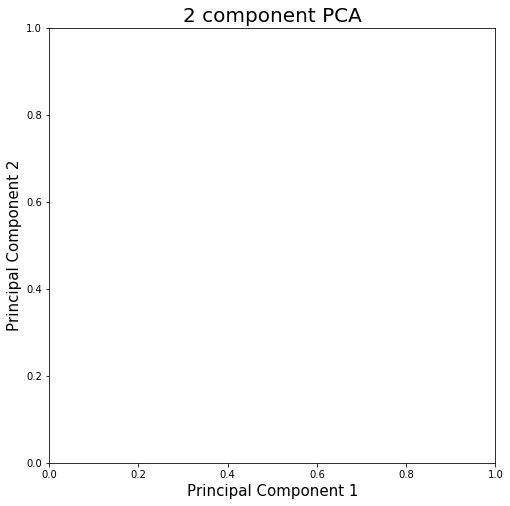

In [8]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()